This is to help with creating a function that returns a preprocessed dataset. Specifically the onset of the reaction interval or maximum rate of reaction interval.

From what I read, it is defined as the steepest slope in the graph. It isn't very rigorous and I personally dont see how we can use this to minimize the time it takes to synthesize a given substance, but that is unrelated right now.<p>
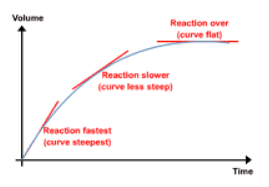
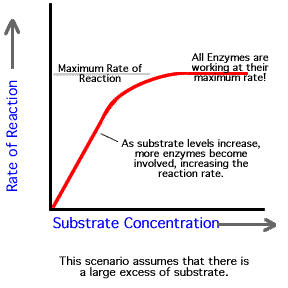<p>
In the excel file we saw each sample have the same interval. This is probably since most graphs had a linear yield and they generalized it to work for the few that weren't linear.<p>
We will assume that changing the amount we use per ingredient will lead to a different reaction vs. time graph. From small reading, I found that we can expect the graph to be linear, exponential, sigmoidal or logarithmic.
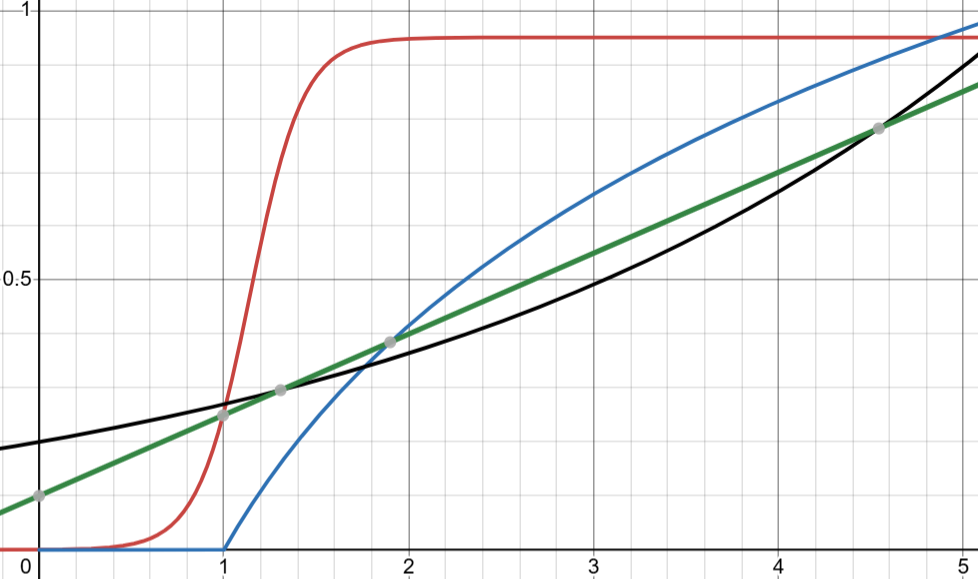<p>
To visualize what I was suggesting with the assumption we make, you can look at `solution_space_substance.ipynb` (really recommended). It outputs the following graph:
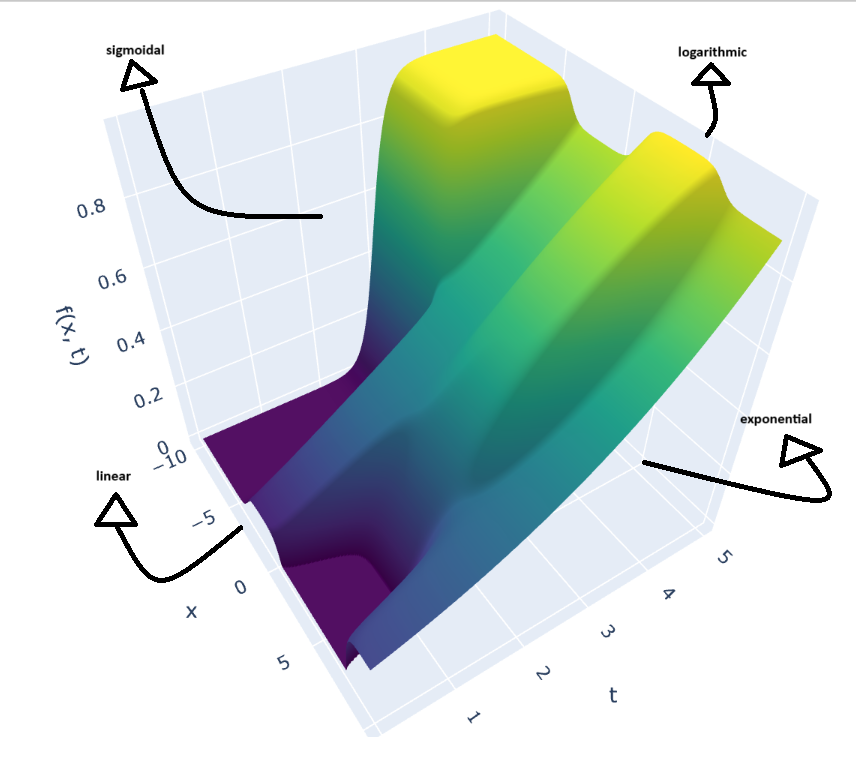<p>
Anyway with the following code I evaluate my fitting results.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.isotonic import IsotonicRegression
from data_generation import sigmoid_fn, linear_fn, exp_fn, log_fn, yield_time_x, dec_exp_fn
from bayesian_opt import preprocessor, least_squares_fitter

Testing quality of method.

We generate 1000 of each function type and see how often we misclassify and how accurate our models are.

In [6]:
a_sig = np.random.uniform(0.1, 1)
b_sig, c_sig = np.random.uniform(0.1, 5, 2)

a_lin = np.random.uniform(0.1, 5)
b_lin = np.random.uniform(-5, 5)

a_exp, b_exp = np.random.uniform(0, 5, 2)

a_neg = np.random.uniform(0.3, 1)
b_neg = np.random.uniform(0.1, 5)
c_neg = np.random.uniform(-5, 5)
d_neg = np.random.uniform(0.1, 0.4)

In [7]:
np.random.seed(42)

params_indices = {'sigmoid': [0, 1, 2],
        'linear': [3, 4],
        'exp': [5, -5],
        'dec exp': [-4, -3, -2, -1]}
params_functs = {'sigmoid': sigmoid_fn,
        'linear': linear_fn,
        'exp': exp_fn,
        'dec exp': dec_exp_fn}


t_vals = np.linspace(0,10,100) 
best_fits = []
all_params_lite = []
incorrects = []
true_y = []
all_scores = []
pre_list = ['sigmoid', 'linear', 'exp', 'dec exp']

for iter in range(1000):
    noise = np.random.uniform(-0.1, 0.1, 100)
    
    a_sig = np.random.uniform(0.1, 1)
    b_sig, c_sig = np.random.uniform(0.1, 5, 2)

    a_lin = np.random.uniform(0.1, 5)
    b_lin = np.random.uniform(-5, 5)

    a_exp, b_exp = np.random.uniform(0, 5, 2)

    a_neg = np.random.uniform(0.3, 1)
    b_neg = np.random.uniform(0.1, 5)
    c_neg = np.random.uniform(0.5, 5)
    d_neg = np.random.uniform(0.1, 0.4)

    t_vals = np.linspace(0,10,100) 
    y_vals_sig = sigmoid_fn(t_vals, a_sig, b_sig, c_sig)
    y_vals_lin = linear_fn(t_vals, a_lin, b_lin)
    y_vals_exp = exp_fn(t_vals, a_exp, b_exp)
    y_vals_neg = dec_exp_fn(t_vals, a_neg, b_neg, c_neg, d_neg)
    no_noise = [y_vals_sig, y_vals_lin, y_vals_exp, y_vals_neg]

    y_vals_sig_n = noise + y_vals_sig
    y_vals_lin_n = noise + y_vals_lin
    y_vals_exp_n = noise + y_vals_exp
    y_vals_neg_n = noise + y_vals_neg

    count = 0
    for y in [y_vals_sig_n, y_vals_lin_n, y_vals_exp_n, y_vals_neg_n]:

        ir = IsotonicRegression(increasing=True)
        iso_fit = ir.fit_transform(t_vals, y)
        params, scores = least_squares_fitter(t_vals, iso_fit)
        best_fit = list(params.keys())[np.argmax(scores)]
        best_fits.append(best_fit)
        true_y.append(pre_list[count])
        all_params_lite.append(params[best_fit])
        all_scores.append(scores[pre_list.index(best_fit)])

        if pre_list[count] != best_fit:
            funct_fit = params_functs[best_fit](t_vals, *params[best_fit])
            incorrects.append([iso_fit, y, funct_fit, no_noise[count], pre_list[count], best_fit])

        count+=1

    


c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarning: overflow encountered in exp
  f = a * (1 - np.exp(-b * t + b * c))
c:\Users\danin\Downloads\ict-f0ntys-internship\data_generation.py:13: RuntimeWarni

['exp', 'linear']

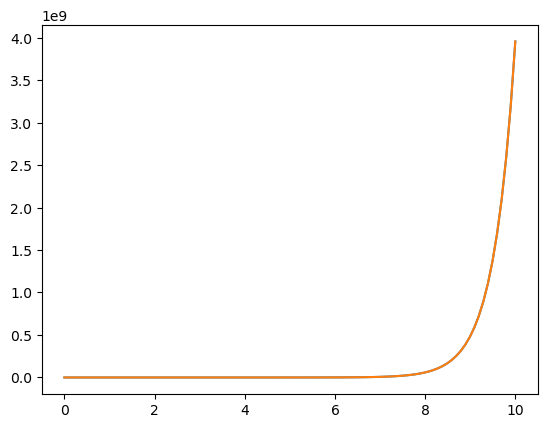

In [8]:
plt.plot(t_vals, incorrects[6][0])
plt.plot(t_vals, incorrects[6][1])
#plt.plot(t_vals, incorrects[6][2])
#plt.plot(t_vals, incorrects[6][3])
incorrects[6][-2:]

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

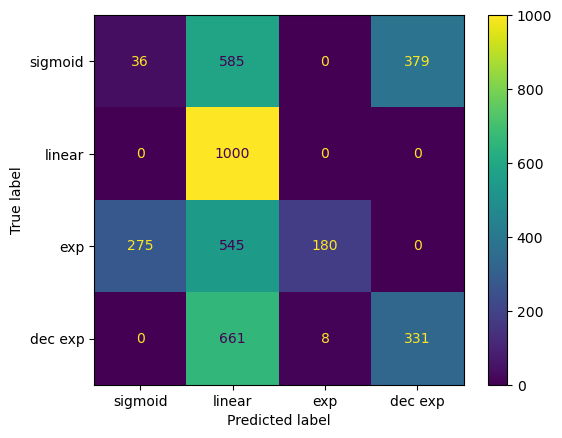

In [10]:
conf_matrix = confusion_matrix(true_y, best_fits, labels=pre_list)
ConfusionMatrixDisplay(conf_matrix, display_labels=pre_list).plot()

C:\Users\danin\AppData\Local\Temp\ipykernel_68144\1113376686.py:6: RuntimeWarning: Mean of empty slice.
  avg_score = all_scores[indices].mean()
c:\Users\danin\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


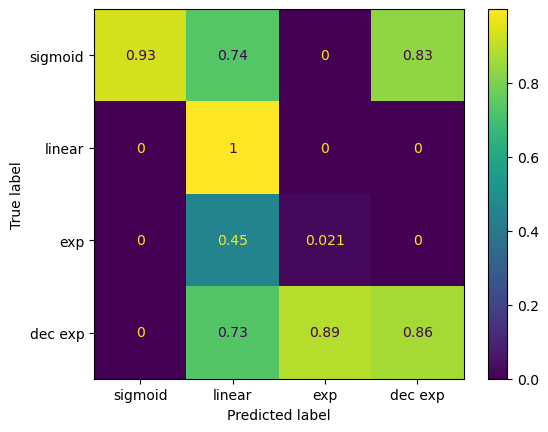

In [11]:
true_y, best_fits, all_scores = np.array(true_y), np.array(best_fits), np.array(all_scores)
scores_matrix = np.zeros((4,4))
for first in range(4):
    for second in range(4):
        indices = np.where((true_y == pre_list[first]) & (best_fits == pre_list[second]))[0]
        avg_score = all_scores[indices].mean()
        if avg_score >= 0:
            scores_matrix[first, second] = avg_score
        else:
            scores_matrix[first, second] = 0


ConfusionMatrixDisplay(scores_matrix, display_labels=pre_list).plot()